In [68]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [69]:
torch.__version__

'2.6.0+cu126'

In [70]:
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * X + b
X[:10], y[:10], len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [71]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train)

40

In [72]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_label, c='b', s=4, label="Training data")
    plt.scatter(test_data,test_label, c='b', s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions)

    # plt.legend(property:{"size": 14})

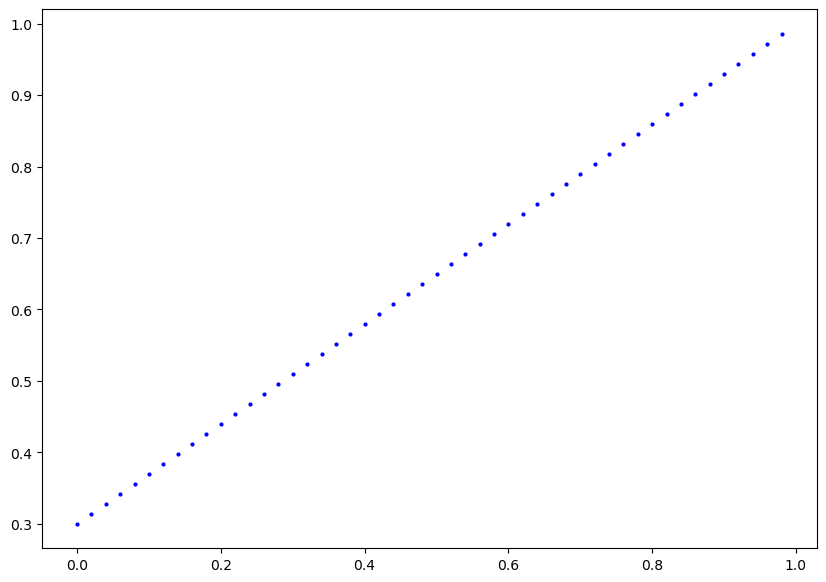

In [73]:
plot_predictions()

In [74]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias 

In [75]:
torch.manual_seed(36)

model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.4704], requires_grad=True),
 Parameter containing:
 tensor([-0.0512], requires_grad=True)]

In [76]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4704])), ('bias', tensor([-0.0512]))])

### inference mode vs no grad

In [77]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.3251],
        [0.3345],
        [0.3439],
        [0.3533],
        [0.3627],
        [0.3721],
        [0.3815],
        [0.3909],
        [0.4003],
        [0.4097]])

In [78]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

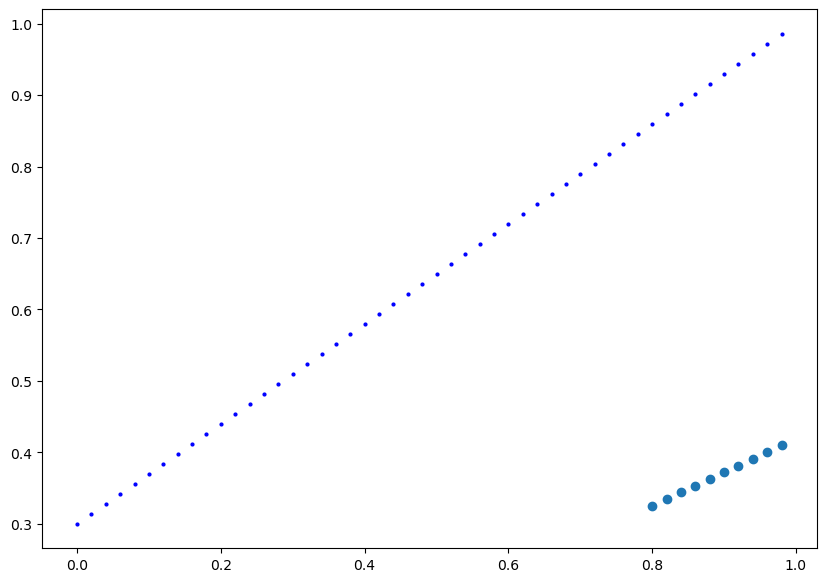

In [79]:
plot_predictions(predictions=y_pred)

In [80]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [81]:
with torch.inference_mode():
    list(model_0.parameters())

In [82]:
epochs = 100
for epoch in range(epochs):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    # 3. optimizer
    optimizer.zero_grad()
    # 4. perform back propagation 
    loss.backward()
    optimizer.step()
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        print(f"epoch: {epoch}, loss: {loss}, test_loss: {test_loss}")
        


epoch: 0, loss: 0.44079118967056274, test_loss: 0.5421218872070312
epoch: 10, loss: 0.32558122277259827, test_loss: 0.40741196274757385
epoch: 20, loss: 0.21037128567695618, test_loss: 0.27270203828811646
epoch: 30, loss: 0.09516123682260513, test_loss: 0.13799205422401428
epoch: 40, loss: 0.015368292108178139, test_loss: 0.037895649671554565
epoch: 50, loss: 0.011517633683979511, test_loss: 0.02622426673769951
epoch: 60, loss: 0.008079780265688896, test_loss: 0.0179517213255167
epoch: 70, loss: 0.00464413920417428, test_loss: 0.010366052389144897
epoch: 80, loss: 0.0016544871032238007, test_loss: 0.0034387886989861727
epoch: 90, loss: 0.006500396877527237, test_loss: 0.0034387886989861727


In [83]:
model_0.state_dict() 

OrderedDict([('weights', tensor([0.6929])), ('bias', tensor([0.2963]))])

In [84]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6929])), ('bias', tensor([0.2963]))])

In [85]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)



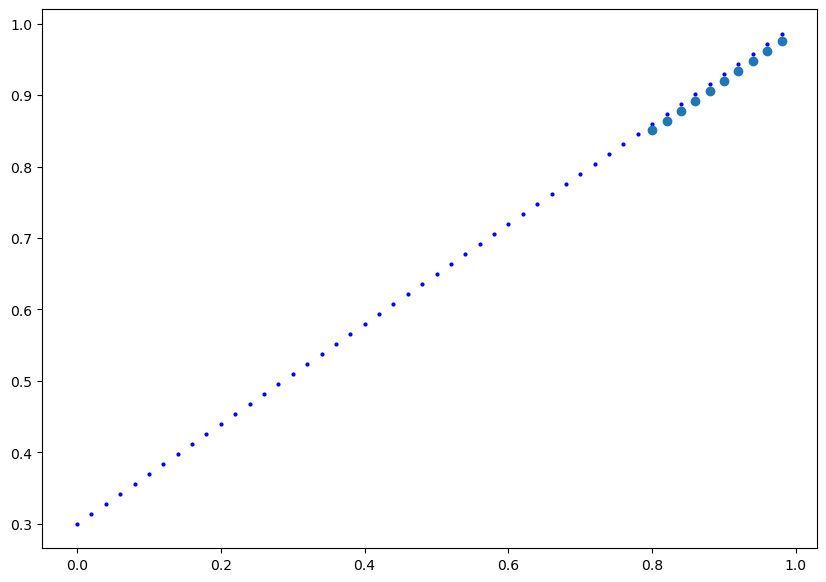

In [86]:
plot_predictions(predictions=y_pred_new)


Saving a model in PyTorch
There are three main methods you should about for saving and loading models in PyTorch.
1. torch.save() - allows you save a PyTorch object in Python's pickle format
2. torch.load() - allows you load a saved PyTorch object
3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary

In [87]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6929])), ('bias', tensor([0.2963]))])

In [88]:
from pathlib import Path


In [89]:
model_pth = Path("models")
model_pth.mkdir(parents=True, exist_ok=True)



In [90]:
model_name = "01_pytorch_workflow.pth"
model_save_pth = model_pth / model_name

model_save_pth

WindowsPath('models/01_pytorch_workflow.pth')

In [91]:
torch.save(model_0.state_dict(), model_save_pth)

In [93]:
load_model_0 = LinearRegression()
load_model_0.load_state_dict(torch.load(model_save_pth))
load_model_0.state_dict()

OrderedDict([('weights', tensor([0.6929])), ('bias', tensor([0.2963]))])

In [94]:
load_model_0.eval()
with torch.inference_mode():
    load_model_preds = load_model_0(X_test)

load_model_preds

tensor([[0.8506],
        [0.8645],
        [0.8783],
        [0.8922],
        [0.9060],
        [0.9199],
        [0.9338],
        [0.9476],
        [0.9615],
        [0.9753]])

# 1. Putting it all together

In [96]:
import torch
from torch import nn
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
torch.__version__

'2.6.0+cu126'

In [100]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print (device)

cuda


In [101]:
!nvidia-smi

Sun Apr 20 11:50:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 571.96                 Driver Version: 571.96         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8              8W /   60W |     367MiB /   4096MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1.1. Data 

In [102]:
w = 0.7
b = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = w * X + b
X[:10], y[:10], len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [103]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train)

40

In [104]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_label, c='b', s=4, label="Training data")
    plt.scatter(test_data,test_label, c='b', s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions)

    # plt.legend(property:{"size": 14})

In [105]:
class LinearRegressionv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    

In [106]:
torch.manual_seed(69)
model_1 = LinearRegressionv2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6796]])),
             ('linear_layer.bias', tensor([0.6083]))])

In [108]:
next(model_1.parameters()).device

device(type='cpu')

In [109]:
model_1.to(device=device)
next(model_1.parameters()).device


device(type='cuda', index=0)

In [110]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(69)
epochs = 100

for epoch in epochs:
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode:
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    
